## Regularization

In [309]:
import numpy as np
import matplotlib.pyplot as plt

In [310]:
x = np.loadtxt('./ex5Data/ex5Linx.dat', dtype=np.float32)
y = np.loadtxt('./ex5Data/ex5Liny.dat', dtype=np.float32)
x.shape, y.shape

((7,), (7,))

In [311]:
x

array([-0.99768, -0.69574, -0.40373, -0.10236,  0.22024,  0.47742,
        0.82229], dtype=float32)

### Plot the Data

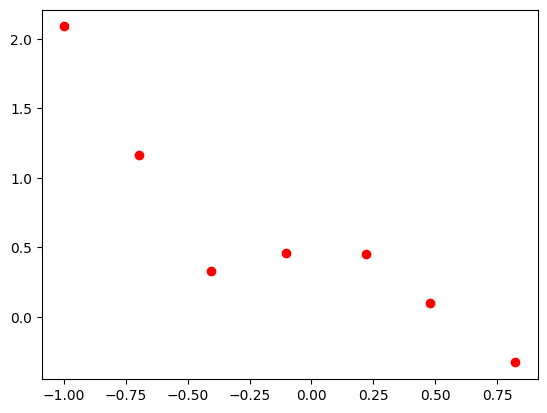

In [312]:
plt.scatter(x,y, marker = 'o', c = 'r')
plt.show()

In [313]:
x.shape[0]

7

## Transforming x into a featured matric X for Polynomial regression up to the fifth order 

In [314]:
X = x.reshape(x.shape[0], 1)

In [315]:
X

array([[-0.99768],
       [-0.69574],
       [-0.40373],
       [-0.10236],
       [ 0.22024],
       [ 0.47742],
       [ 0.82229]], dtype=float32)

In [316]:
X.shape[0]

7

In [317]:
X2 = X**2
X3 = X**3
X4 = X**4
X5 = X**5
X = np.concatenate((np.ones((X.shape[0], 1), dtype= np.float32), X,X2,X3,X4,X5 ), axis=1)

In [318]:
X.shape

(7, 6)

In [319]:
X

array([[ 1.00000000e+00, -9.97680008e-01,  9.95365381e-01,
        -9.93056178e-01,  9.90752280e-01, -9.88453746e-01],
       [ 1.00000000e+00, -6.95739985e-01,  4.84054118e-01,
        -3.36775810e-01,  2.34308392e-01, -1.63017720e-01],
       [ 1.00000000e+00, -4.03730005e-01,  1.62997916e-01,
        -6.58071488e-02,  2.65683215e-02, -1.07264286e-02],
       [ 1.00000000e+00, -1.02360003e-01,  1.04775699e-02,
        -1.07248407e-03,  1.09779474e-04, -1.12370271e-05],
       [ 1.00000000e+00,  2.20239997e-01,  4.85056564e-02,
         1.06828855e-02,  2.35279859e-03,  5.18180372e-04],
       [ 1.00000000e+00,  4.77420002e-01,  2.27929860e-01,
         1.08818270e-01,  5.19520193e-02,  2.48029344e-02],
       [ 1.00000000e+00,  8.22290003e-01,  6.76160872e-01,
         5.56000292e-01,  4.57193494e-01,  3.75945628e-01]], dtype=float32)

### Hypothesis , Cost and Gradient Function

In [320]:
def hypothesis(x,w):
    return np.dot(x,w)

### Regularized Cost Function Formula

In [321]:
def cost(x,y,w, lam):
    reg_term = (lam / (2* x.shape[0])) * np.sum(w[1:]**2)
    return ( 1 / ( 2 *x.shape[0])) * np.sum((hypothesis(x,w) - y)**2) ++ reg_term

#### Regularized Gradient Descent Formula:

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align*}$$

In [322]:
def gradient_theta(x,y,w,lam):
    m = x.shape[0]
    reg_term = lam/m*w
    reg_term[0] = 0
    return (1/m)*np.dot(x.T, (hypothesis(x,w)- y)) + reg_term

In [323]:
X.shape[1]

6

### for Lamda = 0

In [324]:
w = np.zeros(X.shape[1])
epochs = []
costVal = []
lam = 0
lr = 0.01

for i in range(1, 1000):
    costVal.append(cost(X,y,w,lam))
    w = w-lr*gradient_theta(X,y,w,lam)
    epochs.append(i)

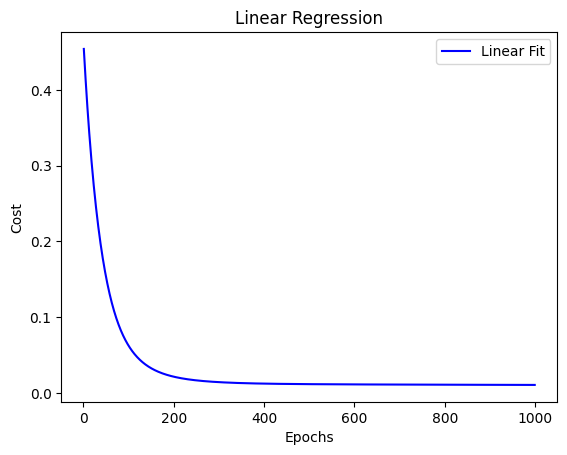

In [325]:
plt.plot(epochs, costVal, c='b', label="Linear Fit")
plt.title("Linear Regression")
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [326]:
w

array([ 0.34473352, -0.49118489,  0.18445829, -0.48006744,  0.20629235,
       -0.40414299])

In [327]:
H = hypothesis(X,w)
H

array([ 2.09897747,  1.05165188,  0.61451364,  0.39748593,  0.24064967,
        0.10072884, -0.25897733])

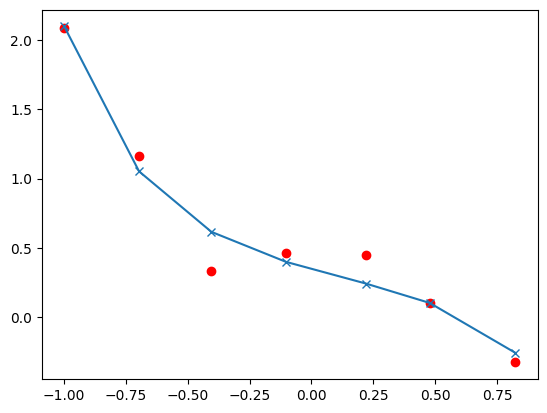

In [328]:
plt.scatter(x,y, marker='o', c='r')
plt.plot(x,H,marker = 'x')
plt.show()

### for lamda = 1

In [329]:
w = np.zeros(X.shape[1])
epochs = []
CostVal = []
lam = 1
lr = 0.01

for i in range (1, 1000):
    CostVal.append(cost(X,y,w,lam))
    w = w - lr*gradient_theta(X,y,w,lam)
    epochs.append(i)

In [330]:
w

array([ 0.39014803, -0.42853918,  0.14705782, -0.38676707,  0.17806864,
       -0.33039282])

In [331]:
H = hypothesis(X,w)
H

array([ 1.85115061,  0.98532046,  0.62085923,  0.43599217,  0.29901567,
        0.17804271, -0.12064122])

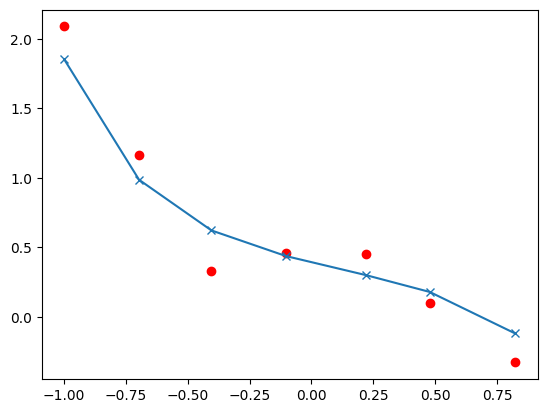

In [332]:
plt.scatter(x,y, marker = 'o', c = 'r')
plt.plot(x,H, marker = 'x')
plt.show()

### for lamda = 10

In [333]:
w = np.zeros(X.shape[1])
epochs = []
CostVal = []
lam = 10
lr = 0.01

for i in range(1, 1000):
    CostVal.append(cost(X,y,w,lam))
    w = w - lr*gradient_theta(X,y,w,lam)
    epochs.append(i)
    

In [334]:
w

array([ 0.5203436 , -0.18250968,  0.06068887, -0.14818138,  0.07435645,
       -0.12796249])

In [335]:
H = hypothesis(X,w)
H

array([1.11014371, 0.76488597, 0.61701989, 0.53982968, 0.48161705,
       0.43160691, 0.31480261])

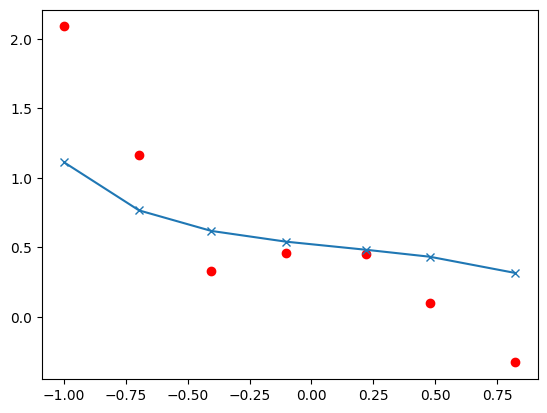

In [336]:
plt.scatter(x,y, marker = 'o', c = 'r')
plt.plot(x,H, marker = 'x')
plt.show()